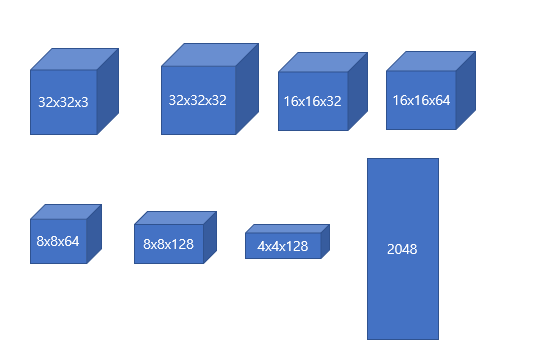

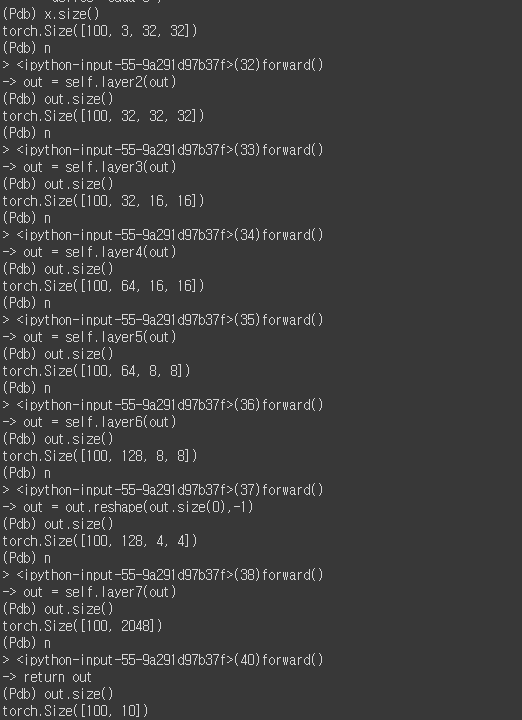

In [72]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# 디버깅용 모듈
import pdb

In [73]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [74]:
num_epochs = 30
num_classes = 10
batch_size = 100
learning_rate = 0.001

# 1단계 - 물리적인 위치에 데이타 저장..다운로드(training/  test)
train_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(), 
                                           download=True)

# training도 ToTensor()를 통해서 스케일링 했다면 test 데이타셋도 당연히 동일한 작업을 해줘야 된다.
test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# 2단계  -  네트워크에 100개씩 잘라서 로드함
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Files already downloaded and verified


# Convolution NeuralNet Model 생성

In [75]:
class ConvNet(nn.Module):
  def __init__(self, num_classes=10):
    super(ConvNet, self).__init__()
    self.layer1 =nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1), 
        nn.BatchNorm2d(num_features=32), 
        nn.ReLU())
    
    self.layer2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64), 
        nn.ReLU())
    
    self.layer4 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer5 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128), 
        nn.ReLU())
    
    self.layer6 = nn.MaxPool2d(kernel_size=2, stride=2)
    
    self.layer7 = nn.Sequential(
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256), 
        nn.ReLU())
    
    self.layer8 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer9 = nn.Linear(2*2*256, num_classes)

  def forward(self, x):

    #  pdb.set_trace()

     out = self.layer1(x)
     out = self.layer2(out)
     out = self.layer3(out)
     out = self.layer4(out)
     out = self.layer5(out)
     out = self.layer6(out)
     out = self.layer7(out)
     out = self.layer8(out)
     out = out.reshape(out.size(0),-1)
     out = self.layer9(out)

     return out

In [76]:
model = ConvNet(num_classes).to(device)

In [77]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [78]:
total_step = len(train_loader)

loss_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # pdb.set_trace()

    outputs = model(images)

    # pdb.set_trace()

    loss = loss_function(outputs, labels)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
       print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/30], Step [100/500], Loss: 1.3519
Epoch [1/30], Step [200/500], Loss: 0.9672
Epoch [1/30], Step [300/500], Loss: 1.2139
Epoch [1/30], Step [400/500], Loss: 0.8480
Epoch [1/30], Step [500/500], Loss: 0.6457
Epoch [2/30], Step [100/500], Loss: 0.6118
Epoch [2/30], Step [200/500], Loss: 0.6766
Epoch [2/30], Step [300/500], Loss: 0.9382
Epoch [2/30], Step [400/500], Loss: 0.7289
Epoch [2/30], Step [500/500], Loss: 0.8162
Epoch [3/30], Step [100/500], Loss: 0.5801
Epoch [3/30], Step [200/500], Loss: 0.5839
Epoch [3/30], Step [300/500], Loss: 0.5029
Epoch [3/30], Step [400/500], Loss: 0.7172
Epoch [3/30], Step [500/500], Loss: 0.5031
Epoch [4/30], Step [100/500], Loss: 0.4390
Epoch [4/30], Step [200/500], Loss: 0.7226
Epoch [4/30], Step [300/500], Loss: 0.5801
Epoch [4/30], Step [400/500], Loss: 0.4774
Epoch [4/30], Step [500/500], Loss: 0.4137
Epoch [5/30], Step [100/500], Loss: 0.3739
Epoch [5/30], Step [200/500], Loss: 0.4376
Epoch [5/30], Step [300/500], Loss: 0.3170
Epoch [5/30

In [79]:
model.eval()
with torch.no_grad(): # 실제로 학습할 필요가 없으면 no.grad()구문을 넣어준다.
    correct = 0
    total = 0
    for images, labels in test_loader: # 인덱스를 굳이 안받아도 되니깐 enumeratorr가 빠졌다.
        images = images.to(device) #한줄로 죽 펼친 다음에 입력받아서
        labels = labels.to(device) # 라벨도 마찬가지로
        outputs = model(images) #모델에 넣고
        _, predicted = torch.max(outputs.data, 1)
        # total은 푼 문제, correct는 맞춘 문제수..이런식으로 카운팅이 들어간다
     
        total += labels.size(0) 
        correct += (predicted == labels).sum().item()
        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 80.0 %
Test Accuracy of the model on the 10000 test images: 81.0 %
Test Accuracy of the model on the 10000 test images: 77.66666666666667 %
Test Accuracy of the model on the 10000 test images: 76.0 %
Test Accuracy of the model on the 10000 test images: 75.0 %
Test Accuracy of the model on the 10000 test images: 76.16666666666667 %
Test Accuracy of the model on the 10000 test images: 75.57142857142857 %
Test Accuracy of the model on the 10000 test images: 75.25 %
Test Accuracy of the model on the 10000 test images: 75.33333333333333 %
Test Accuracy of the model on the 10000 test images: 75.8 %
Test Accuracy of the model on the 10000 test images: 75.81818181818181 %
Test Accuracy of the model on the 10000 test images: 75.75 %
Test Accuracy of the model on the 10000 test images: 75.46153846153847 %
Test Accuracy of the model on the 10000 test images: 75.85714285714286 %
Test Accuracy of the model on the 10000 test images: 75.46666666666

In [80]:
images.size()
images[0][0].size()

torch.Size([32, 32])

In [81]:
import numpy as np
import matplotlib.pyplot as plt

Label : 0
Prediction : 0


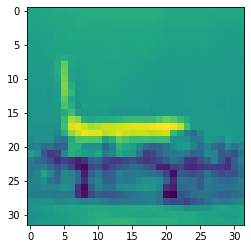

In [82]:
idx = 12
image = np.array(images[idx, 0].detach().cpu()) # detach() : 연산에서 분리, cpu() : gpu()에서 내림
label = labels[idx].item()
pred = predicted[idx].item()

plt.imshow(image * 255)
print("Label :", label)
print("Prediction :", pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


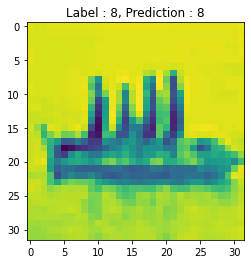

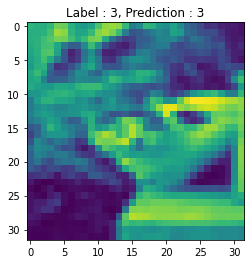

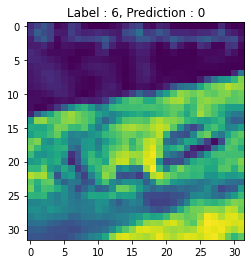

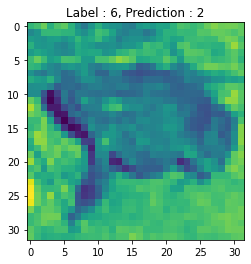

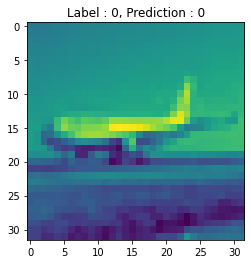

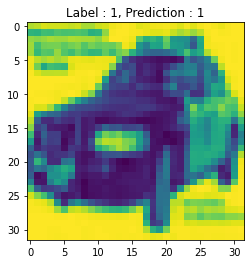

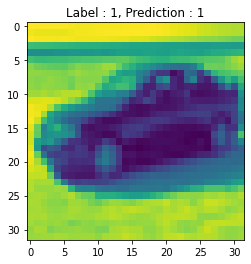

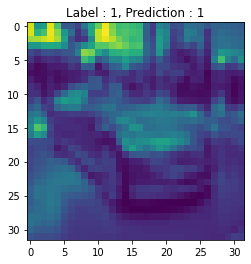

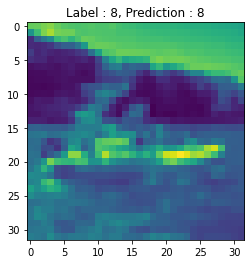

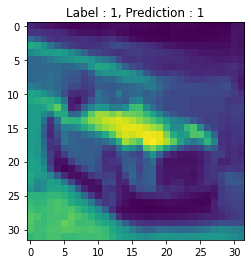

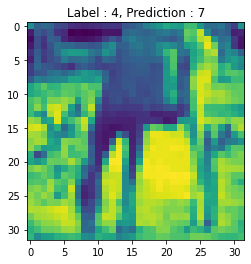

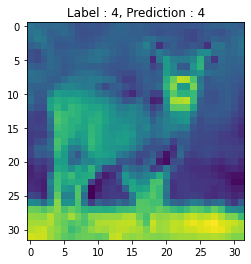

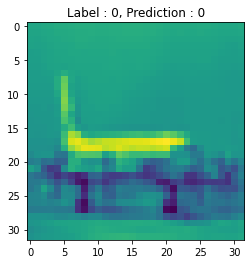

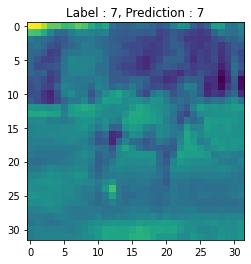

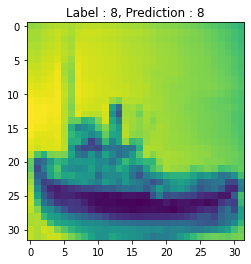

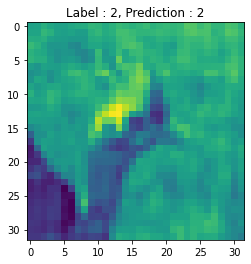

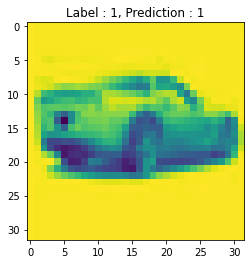

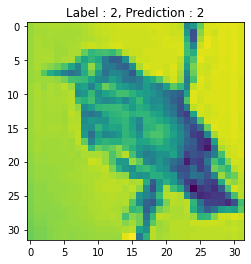

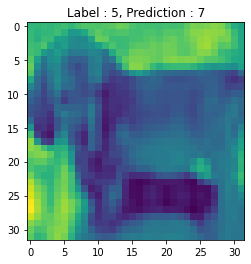

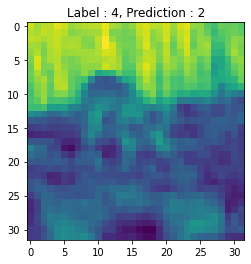

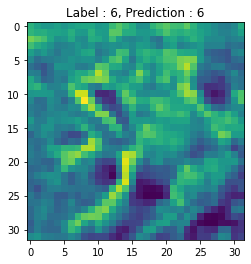

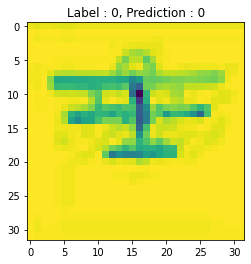

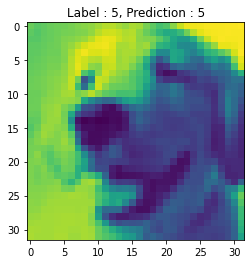

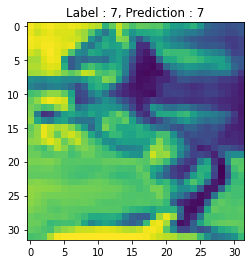

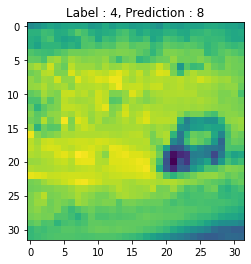

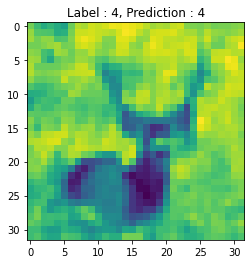

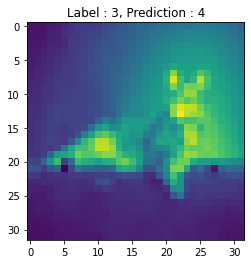

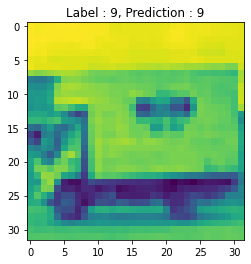

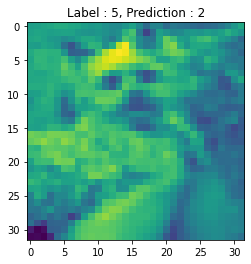

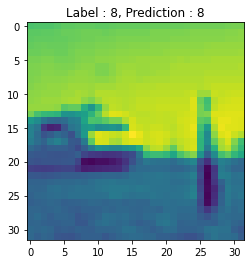

In [83]:
for idx in range(30):
    image = np.array(images[idx, 0].detach().cpu())
    label = labels[idx].item()
    pred = predicted[idx].item()

    plt.figure()
    plt.title(f"Label : {label}, Prediction : {pred}")
    plt.imshow(image * 255)

### Loss 시각화

Text(0.5, 0, 'Epoch')

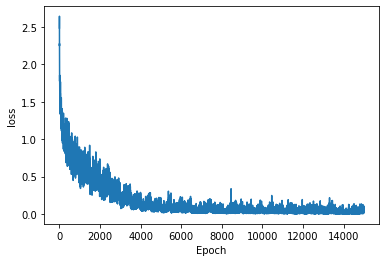

In [84]:
plt.plot(range(num_epochs * total_step), loss_list)
plt.ylabel('loss')
plt.xlabel('Epoch')